In [1]:
import librosa
from scipy.io import wavfile as wav
import numpy as np

filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Kicks/BTDK_Kick_01.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate 22050


C:\Users\Sil\Anaconda3\envs\testenv\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [2]:
filename2 = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Kicks/BTDK_Kick_02.wav'

librosa_audio2, librosa_sample_rate2 = librosa.load(filename2)
scipy_sample_rate, scipy_audio = wav.read(filename2)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate', librosa_sample_rate)

Original sample rate: 48000
Librosa sample rate 22050


In [67]:
import scipy as sp

D1 = np.abs(librosa.stft(librosa_audio))
D2 = np.abs(librosa.stft(librosa_audio2))

sp.signal.correlate(D1, D2)

array([[ 2.25827098e-04,  1.35085883e-03,  1.47157907e-03, ...,
         7.75045156e-02,  6.63159788e-02,  1.48633337e-02],
       [-1.30920415e-03, -1.10877759e-03, -6.67619694e-04, ...,
         2.56254971e-01,  1.08549550e-01,  1.99412405e-02],
       [ 3.77199659e-03,  3.17296991e-03,  1.65019033e-03, ...,
         4.81476784e-01,  1.29729748e-01,  2.66123544e-02],
       ...,
       [ 2.66231056e-02,  1.28471598e-01,  4.79373932e-01, ...,
         1.18827818e-04,  5.10859478e-04,  1.11227040e-03],
       [ 2.09923740e-02,  1.09339334e-01,  2.57625908e-01, ...,
         2.45428085e-03,  2.01932783e-03,  1.62991881e-03],
       [ 1.36905909e-02,  6.69775978e-02,  7.99253732e-02, ...,
         4.92420804e-04,  1.83188924e-04, -1.46455027e-03]], dtype=float32)

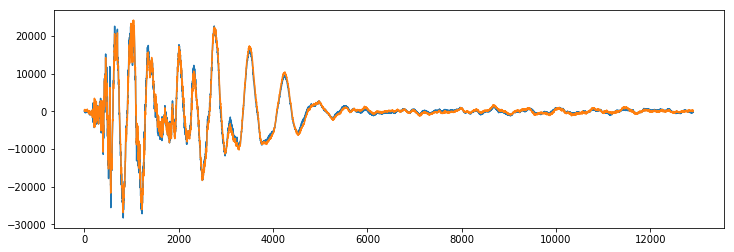

In [4]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

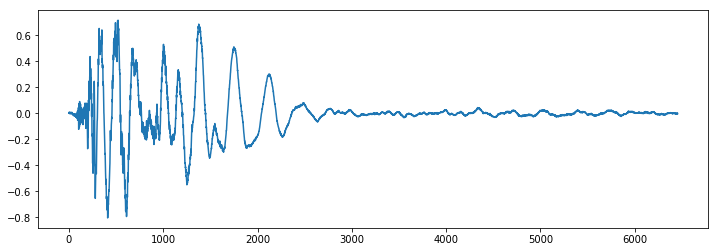

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)
stft = np.abs(librosa.stft(librosa_audio))
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=librosa_sample_rate).T, axis=0)

(40, 13)


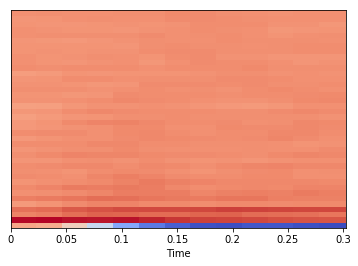

In [7]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

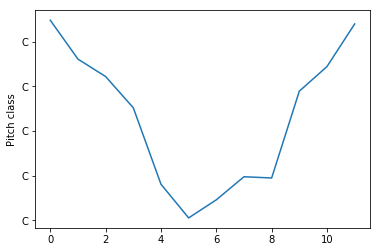

In [8]:
import matplotlib.pyplot as plt
values = chroma
plt.figure()
ax = plt.gca()
ax.plot(values)
ax.yaxis.set_major_formatter(librosa.display.ChromaFormatter())
ax.set_ylabel('Pitch class')
plt.show()

In [3]:
import librosa
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import os

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        stft = np.abs(librosa.stft(audio))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        mfccsscaled = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file:", file_name)
        return None
    
    return mfccsscaled, chroma

metadata = pd.read_csv('C:/dev/school/samples.csv')

features = []

for index, row in metadata.iterrows():
    
    file_name = str(row["path"])
    class_label = row[1]
    data, data2 = extract_features(file_name)
    #print(data)
    features.append([data, class_label])
    print(data2)

featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

[0.9078116  0.8305947  0.7138033  0.6219494  0.5653052  0.5286649
 0.5497819  0.6149449  0.72986645 0.7879791  0.92024696 0.9443905 ]
[0.8270366  0.8049189  0.7598192  0.7083214  0.7772423  0.8001005
 0.8137127  0.7768177  0.78929496 0.8705002  0.9117741  0.92798084]
[0.78478867 0.7758112  0.85392827 0.8818648  0.79919153 0.90590274
 0.9153461  0.82615644 0.80800104 0.86229527 0.8773945  0.80588245]
[0.7065365  0.70103645 0.7765613  0.92267644 0.9522446  0.765844
 0.6852852  0.62260026 0.55422246 0.55423844 0.6048052  0.741346  ]
[0.9128064  0.9367998  0.82235795 0.76033765 0.72175264 0.7181462
 0.6872536  0.7791708  0.76882315 0.81307    0.8609246  0.8734374 ]
[0.8725514  0.9042642  0.8442574  0.789128   0.7930664  0.8103139
 0.90067744 0.94109005 0.91326153 0.93314844 0.81493723 0.8633706 ]
[0.79514205 0.9147978  0.88006306 0.78951323 0.77216244 0.84998167
 0.81846476 0.8486328  0.84583414 0.8522952  0.82451534 0.7688283 ]
[0.81680286 0.8700893  0.8917531  0.8571272  0.8428335  0.842

 0.8194771  0.8094617  0.8580631  0.89345866 0.904004   0.92316824]
[0.6392129  0.67573446 0.7541668  0.932687   0.93044186 0.73060966
 0.72277045 0.73228717 0.69581985 0.6452894  0.698147   0.67009616]
[0.81020916 0.83291835 0.7729111  0.8136607  0.87602437 0.8409174
 0.8587908  0.871215   0.83035344 0.79918015 0.80572355 0.8247134 ]
[0.7551244  0.82952887 0.8770937  0.916087   0.8570594  0.7813863
 0.76281416 0.8086706  0.79860246 0.8317453  0.8458744  0.7832296 ]
[0.8777763  0.8476836  0.8809551  0.8331574  0.90771514 0.8737489
 0.86797017 0.89484704 0.88510627 0.87760323 0.8695816  0.89907444]
[0.8785603  0.8524494  0.79486233 0.7926282  0.78419566 0.80885124
 0.83824813 0.8707     0.8921117  0.8646417  0.8684698  0.90258026]
[0.7038542  0.74273866 0.5212489  0.42444232 0.51942194 0.8195662
 0.9849521  0.6961151  0.6064645  0.50300944 0.61747354 0.74987257]
[0.57024646 0.52134913 0.6882608  0.97567946 0.75788933 0.58079976
 0.60331017 0.5705958  0.5420501  0.5711164  0.600904   0.6

C:\Users\Sil\Anaconda3\envs\testenv\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


[0.6944081  0.8178002  0.9927232  0.89339936 0.7809959  0.73656714
 0.73872274 0.6728111  0.7277517  0.76346207 0.76132697 0.6777776 ]
[0.6959207  0.5749562  0.51691186 0.87130815 0.8894923  0.6361368
 0.6460297  0.71120304 0.836097   0.80825627 0.9442073  0.8098207 ]
[0.8238802  0.70556766 0.57214195 0.40339065 0.40019855 0.44114572
 0.5321756  0.6954564  0.95276576 0.96841776 0.9340081  0.69581985]
[0.992966   0.54032713 0.5183817  0.5791351  0.56522167 0.7499609
 0.833449   0.7479482  0.68474627 0.7354174  0.8203007  0.9886185 ]
[0.9090101  0.76780385 0.7184753  0.6945659  0.7397728  0.7626702
 0.77113277 0.8525992  0.83122396 0.91377836 0.90502346 0.9397635 ]
[0.6700349  0.4762118  0.30981255 0.26159114 0.268148   0.35416442
 0.4626217  0.46201956 0.9053809  0.9291282  1.         0.85214293]
[0.8420792  0.7206861  0.57202077 0.38682836 0.38732454 0.4496575
 0.542902   0.7088666  0.9606484  0.9562996  0.91510975 0.6966946 ]
[0.61732113 0.469063   0.36986    0.30155212 0.32246813 0.4

 0.7730126  0.7763655  0.83092695 0.8069983  0.78936213 0.8142464 ]
[0.6586992  0.6380424  0.64062536 0.66013545 0.7056308  0.7339917
 0.74099964 0.8067747  0.8889381  0.93788224 0.8604827  0.7445923 ]
[0.72102636 0.6807139  0.6113455  0.5396991  0.5637426  0.63956076
 0.79191303 0.91791433 0.9643158  0.92545474 0.7549932  0.7145379 ]
[0.7559086  0.670857   0.6276958  0.66124696 0.72947484 0.8879024
 0.91086614 0.9898348  0.81718695 0.6228992  0.62935525 0.73029447]
[0.746934   0.9057267  0.5973441  0.606113   0.6533525  0.65605587
 0.6268623  0.6971047  0.7122954  0.5961047  0.55418056 0.5720825 ]
[0.8084427  0.81529963 0.83184814 0.84723985 0.89849234 0.8573977
 0.85285455 0.8366827  0.8165434  0.8616352  0.78070164 0.7289635 ]
[0.73353136 0.6901519  0.6657108  0.6812471  0.6740236  0.6483597
 0.681013   0.6708982  0.6630895  0.6241529  0.6963428  0.91221464]
[0.52784735 0.43472803 0.4364616  0.46635893 0.44190863 0.46664554
 0.543522   0.47600776 0.49306256 0.4933532  0.6048268  0.9

 0.806569   0.7902933  0.79676807 0.81065476 0.81889844 0.8652406 ]
[0.89866775 0.9553938  0.90546215 0.90152496 0.89784014 0.8390568
 0.8868034  0.89315844 0.90285873 0.84730136 0.9183332  0.8323974 ]
[0.78493834 0.4961067  0.47130376 0.50931436 0.5920609  0.63539445
 0.68051064 0.6365427  0.624026   0.65516746 0.6563214  0.80097264]
[0.8720985  0.6892354  0.6711872  0.66979074 0.6960868  0.74674696
 0.7494878  0.8302713  0.8250529  0.8037844  0.71295565 0.8457797 ]
[0.7706083  0.86539733 0.92588377 0.8945247  0.89912707 0.9023477
 0.8749808  0.78904605 0.7563058  0.73841643 0.7156296  0.73998094]
[0.84419316 0.7642906  0.7602285  0.7994056  0.865837   0.85265315
 0.74259835 0.78821015 0.8462163  0.84448826 0.89319354 0.87936366]
[0.96172523 0.6055478  0.5388777  0.5349655  0.5134582  0.52651966
 0.54342186 0.5780207  0.5489936  0.60286385 0.6038286  0.8669249 ]
[0.95150965 0.7270502  0.6735462  0.6779883  0.69846857 0.6690024
 0.64854795 0.6520986  0.61510247 0.64622575 0.67590654 0.

 0.7202938  0.79766136 0.7344266  0.7840627  0.80659944 0.86598957]
[0.82279474 0.9711525  0.83724385 0.74651104 0.759248   0.7576678
 0.75173986 0.8443848  0.7392438  0.67749655 0.6787778  0.6645173 ]
[0.88934743 0.85083723 0.7746314  0.7387153  0.7860329  0.89696103
 0.8701388  0.8274004  0.855117   0.85941184 0.8028083  0.8012234 ]
[0.8656406  0.83689094 0.817196   0.8001748  0.80439746 0.79243934
 0.82522655 0.9030909  0.8873742  0.8502434  0.8001254  0.8571542 ]
[0.8122457  0.74530965 0.76793283 0.7347229  0.73756605 0.75457495
 0.7882582  0.79925865 0.77168334 0.7723499  0.834028   0.91600853]
[0.88060164 0.66083264 0.679288   0.6201689  0.6943726  0.6811788
 0.73269284 0.82517993 0.7403587  0.7259298  0.65710616 0.7747072 ]
[0.9236386  0.89180416 0.91607547 0.8864962  0.86919516 0.89055437
 0.869138   0.8358373  0.7715259  0.7821707  0.8300219  0.91355765]
[0.802268   0.7578231  0.78594786 0.8288646  0.8633958  0.9435793
 0.964524   0.91786134 0.89206994 0.86865723 0.8481404  0.

 0.5957592  0.5352185  0.44176397 0.51498574 0.7521241  0.6081017 ]
[0.17696476 0.16067977 0.25654972 0.3955915  0.23724176 0.20159513
 0.27409306 0.5936647  1.         0.64242125 0.36044648 0.2488688 ]
[0.57531506 0.89145947 0.2536132  0.25466785 0.08959977 0.18972227
 0.15604866 0.15045421 0.05256005 0.08211829 0.18798722 1.        ]
[0.11365467 0.10553851 0.09662689 0.12885484 0.18730123 0.16056186
 0.14351474 0.09930155 0.08380243 0.28280193 0.99651474 0.18453875]
[0.7173846  0.7937638  0.7347111  0.79314893 0.7658396  0.6869142
 0.7814393  0.89603925 0.85116744 0.81646127 0.6910134  0.65704054]
[0.0591551  0.09044373 0.06073761 0.1242783  0.11721821 0.20726234
 0.10964618 0.11103592 0.04488004 0.08427428 1.         0.4773282 ]
[0.36888313 0.3680901  0.35955718 0.39349034 0.61833596 0.98163486
 0.71166027 0.45646334 0.4097308  0.41515365 0.34757054 0.3725515 ]
[0.35113177 0.38920286 0.5241962  0.9448277  0.41037756 0.24928865
 0.33032402 0.38053745 0.5555731  0.57584333 0.58546805 

[0.63483036 0.5191883  0.48117736 0.56568575 0.69394547 0.7249562
 0.6397794  0.5153896  0.48756638 0.54712814 0.58080155 0.7502317 ]
[0.8173955  0.68195635 0.63592154 0.612502   0.57835346 0.5842569
 0.60655844 0.59104085 0.5708881  0.6207444  0.6283939  0.6981847 ]
[0.83739954 0.58931535 0.5788296  0.60606074 0.6404107  0.7294496
 0.69982463 0.68220985 0.62272936 0.65335834 0.65873647 0.7970453 ]
[0.5035856  0.4784232  0.5773713  0.9000495  0.66763455 0.6529358
 0.6226041  0.55927956 0.6146205  0.5316757  0.44520074 0.46219644]
[0.8257495  0.81438506 0.80328095 0.81121933 0.81330174 0.7974144
 0.8431398  0.81526566 0.76788116 0.7802406  0.8022394  0.87057126]
[0.62042594 0.38229248 0.34980357 0.50088096 0.7217228  0.57756484
 0.4910875  0.62439185 0.53798085 0.5821899  0.5708078  0.71161544]
[0.96966237 0.7127031  0.5578656  0.4839599  0.44127387 0.42622808
 0.47146243 0.52568465 0.4747834  0.4752589  0.5498164  0.7775177 ]
[0.56238526 0.44117776 0.39300007 0.5102876  0.7881428  0.91

[0.64202625 0.58700514 0.5618439  0.5917264  0.5579247  0.47251886
 0.62438    0.6381802  0.70306414 0.67337406 0.5563418  0.70125765]
[0.6934443  0.6572195  0.66539073 0.6852117  0.7721566  0.9243909
 0.94979954 0.89600515 0.7586964  0.72839963 0.75416636 0.69777334]
[0.82868534 0.61083394 0.49864438 0.57424724 0.6787791  0.68240535
 0.6473667  0.6805941  0.667231   0.65217495 0.6093936  0.8029905 ]
[0.7489618  0.55523485 0.5327157  0.5245918  0.49674702 0.4973894
 0.54221165 0.5647939  0.54005444 0.55906034 0.5447811  0.6386267 ]
[0.83337665 0.66828537 0.4491702  0.37887457 0.34034833 0.38695922
 0.552949   0.5884083  0.4881377  0.4896585  0.47665998 0.59906274]
[0.61588866 0.56919384 0.62857836 0.6895324  0.809552   0.76394826
 0.68526185 0.5711769  0.6086536  0.53954494 0.5616917  0.8254452 ]
[0.6157253  0.6296215  0.5938581  0.52383333 0.5942398  0.64808625
 0.67959696 0.6474752  0.6117404  0.67202884 0.828226   0.91558796]
[0.54211146 0.45667595 0.43128386 0.5339923  0.68959427 0

[0.5573576  0.41357228 0.40461957 0.3552452  0.3343585  0.30046716
 0.35137054 0.43312758 0.6475386  0.817857   0.86389345 0.7779464 ]
[0.5212547  0.46939778 0.29782638 0.30675453 0.38296998 0.5338639
 0.6574488  0.73603714 0.5791373  0.40514764 0.30815044 0.27263948]
[0.6435178  0.5841401  0.588301   0.615507   0.5835444  0.51192576
 0.44645286 0.4693417  0.4988206  0.61973023 0.62467986 0.63879895]
[0.90144503 0.78253895 0.7264651  0.73975605 0.7284351  0.70519775
 0.73550004 0.8052092  0.7602776  0.7774747  0.7683494  0.78388727]
[0.6825855  0.5389525  0.5049724  0.519758   0.55146533 0.59261143
 0.5901457  0.66168684 0.6079443  0.57235616 0.5448592  0.54210544]
[0.7589423  0.6400292  0.56723595 0.56846535 0.6085034  0.6456988
 0.6509934  0.71322286 0.6483873  0.6037026  0.5817663  0.57725626]
[0.5920318  0.62782717 0.48241776 0.43557036 0.49837354 0.6052862
 0.7502467  0.787325   0.6454636  0.50552934 0.4762989  0.4078073 ]
[0.55487597 0.318188   0.27841392 0.29588437 0.3908569  0.

[0.8656212  0.4952088  0.44758672 0.49080572 0.55031836 0.54058725
 0.5176565  0.6112722  0.4957053  0.44727802 0.46010303 0.54263234]
[0.7832501  0.7610307  0.6140653  0.58316445 0.6060233  0.63935924
 0.649359   0.76527566 0.72705483 0.6166872  0.60285    0.57579297]
[0.6547283  0.5831486  0.44107142 0.47343874 0.59904706 0.82674295
 0.7654017  0.694065   0.5551403  0.50449765 0.37595975 0.38525474]
[0.56922805 0.42112213 0.6179399  0.7227337  0.87156326 0.9631726
 0.78579223 0.6054967  0.5289608  0.308668   0.32515335 0.5511481 ]
[0.6515946  0.5722686  0.43167973 0.4622612  0.5924016  0.8197176
 0.7608524  0.6926297  0.54569197 0.4924391  0.3686064  0.3820018 ]
[0.73612726 0.47009453 0.42475393 0.37934837 0.4536727  0.463461
 0.52849257 0.65208673 0.5362452  0.47821555 0.4641474  0.4610319 ]
[0.93846613 0.85262024 0.7633066  0.6681698  0.62991834 0.5464836
 0.56900865 0.68916285 0.67469335 0.61437726 0.67447996 0.76106584]
[0.8959789  0.49546042 0.44547653 0.4723894  0.5389418  0.51

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features to numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [5]:
y

array(['Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Clap', 'Clap', 'Clap', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [41]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [44]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 1799      
__________

In [45]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
from keras.models import model_from_json

num_epochs = 200
num_batch_size = 32

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start

print("Training completed in time: ", duration)

Saved model to disk
Train on 548 samples, validate on 138 samples
Epoch 1/200
548/548 [==============================] - 1s 1ms/step - loss: 8.8070 - acc: 0.3777 - val_loss: 7.7786 - val_acc: 0.4638

Epoch 00001: val_loss improved from inf to 7.77856, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/200
548/548 [==============================] - 0s 108us/step - loss: 7.5272 - acc: 0.4726 - val_loss: 6.3148 - val_acc: 0.5797

Epoch 00002: val_loss improved from 7.77856 to 6.31475, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 3/200
548/548 [==============================] - 0s 106us/step - loss: 6.4198 - acc: 0.5347 - val_loss: 5.9867 - val_acc: 0.6014

Epoch 00003: val_loss improved from 6.31475 to 5.98673, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 4/200
548/548 [==============================] - 0s 107us/step - loss: 5.5453 - acc: 0.6150 - val_loss: 6.0303 - val_acc: 0.5652

Epoch 00004: val_loss did not improve from 5.98673
Epoch 

548/548 [==============================] - 0s 127us/step - loss: 0.8079 - acc: 0.7901 - val_loss: 0.6854 - val_acc: 0.7681

Epoch 00038: val_loss improved from 0.69226 to 0.68537, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 39/200
548/548 [==============================] - 0s 118us/step - loss: 0.6315 - acc: 0.8339 - val_loss: 0.7018 - val_acc: 0.7754

Epoch 00039: val_loss did not improve from 0.68537
Epoch 40/200
548/548 [==============================] - 0s 106us/step - loss: 0.6503 - acc: 0.8102 - val_loss: 0.6742 - val_acc: 0.7899

Epoch 00040: val_loss improved from 0.68537 to 0.67425, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 41/200
548/548 [==============================] - 0s 107us/step - loss: 0.5696 - acc: 0.8175 - val_loss: 0.6704 - val_acc: 0.8188

Epoch 00041: val_loss improved from 0.67425 to 0.67042, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 42/200
548/548 [==============================] - 0s 102us/step - los

548/548 [==============================] - 0s 106us/step - loss: 0.1647 - acc: 0.9398 - val_loss: 0.6200 - val_acc: 0.8261

Epoch 00079: val_loss did not improve from 0.51709
Epoch 80/200
548/548 [==============================] - 0s 107us/step - loss: 0.1592 - acc: 0.9325 - val_loss: 0.6142 - val_acc: 0.8188

Epoch 00080: val_loss did not improve from 0.51709
Epoch 81/200
548/548 [==============================] - 0s 100us/step - loss: 0.1579 - acc: 0.9416 - val_loss: 0.5862 - val_acc: 0.8623

Epoch 00081: val_loss did not improve from 0.51709
Epoch 82/200
548/548 [==============================] - 0s 109us/step - loss: 0.1627 - acc: 0.9398 - val_loss: 0.7093 - val_acc: 0.8261

Epoch 00082: val_loss did not improve from 0.51709
Epoch 83/200
548/548 [==============================] - 0s 102us/step - loss: 0.1668 - acc: 0.9453 - val_loss: 0.7517 - val_acc: 0.8116

Epoch 00083: val_loss did not improve from 0.51709
Epoch 84/200
548/548 [==============================] - 0s 118us/step - l


Epoch 00122: val_loss did not improve from 0.51709
Epoch 123/200
548/548 [==============================] - 0s 106us/step - loss: 0.1252 - acc: 0.9635 - val_loss: 0.8353 - val_acc: 0.8333

Epoch 00123: val_loss did not improve from 0.51709
Epoch 124/200
548/548 [==============================] - 0s 107us/step - loss: 0.0656 - acc: 0.9763 - val_loss: 0.7561 - val_acc: 0.8406

Epoch 00124: val_loss did not improve from 0.51709
Epoch 125/200
548/548 [==============================] - 0s 107us/step - loss: 0.0837 - acc: 0.9672 - val_loss: 0.7827 - val_acc: 0.8261

Epoch 00125: val_loss did not improve from 0.51709
Epoch 126/200
548/548 [==============================] - 0s 107us/step - loss: 0.0824 - acc: 0.9708 - val_loss: 0.7934 - val_acc: 0.8261

Epoch 00126: val_loss did not improve from 0.51709
Epoch 127/200
548/548 [==============================] - 0s 104us/step - loss: 0.0856 - acc: 0.9653 - val_loss: 0.6938 - val_acc: 0.8696

Epoch 00127: val_loss did not improve from 0.51709
Epo

548/548 [==============================] - 0s 109us/step - loss: 0.0405 - acc: 0.9891 - val_loss: 0.8120 - val_acc: 0.8406

Epoch 00166: val_loss did not improve from 0.51709
Epoch 167/200
548/548 [==============================] - 0s 106us/step - loss: 0.0316 - acc: 0.9872 - val_loss: 0.8142 - val_acc: 0.8478

Epoch 00167: val_loss did not improve from 0.51709
Epoch 168/200
548/548 [==============================] - 0s 102us/step - loss: 0.0366 - acc: 0.9836 - val_loss: 0.7206 - val_acc: 0.8841

Epoch 00168: val_loss did not improve from 0.51709
Epoch 169/200
548/548 [==============================] - 0s 107us/step - loss: 0.0538 - acc: 0.9763 - val_loss: 0.8637 - val_acc: 0.8406

Epoch 00169: val_loss did not improve from 0.51709
Epoch 170/200
548/548 [==============================] - 0s 102us/step - loss: 0.0657 - acc: 0.9799 - val_loss: 0.7595 - val_acc: 0.8551

Epoch 00170: val_loss did not improve from 0.51709
Epoch 171/200
548/548 [==============================] - 0s 109us/ste

In [46]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9908759124087592
Testing Accuracy:  0.8333333341971688


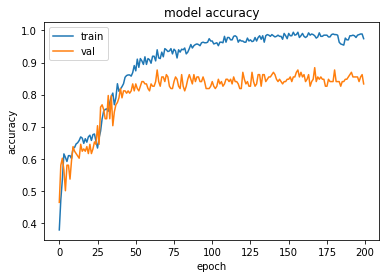

In [47]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('mlp_accuracy_epoch=200_dropout=02')
plt.show()

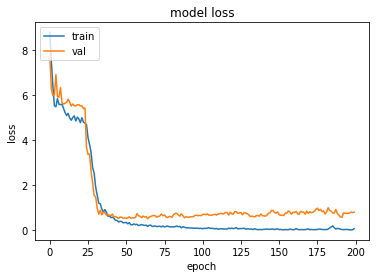

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('mlp_modelloss_epoch=200_dropout=02')
plt.show()

In [34]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [37]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print(le.inverse_transform(predicted_vector))
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [38]:
filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Muffled Drums Vol. 1/Cymbals/Ride/Ride (28).wav' 
print_prediction(filename)

['Snare']
The predicted class is: Snare 

Bassline 		 :  0.00000000000000000000000608377616
Break 		 :  0.00000000000000000521493328847066
Clap 		 :  0.00000000000000000000045294555447
Crash 		 :  0.00000000000000894004566421224486
Hat 		 :  0.00000000000000017070051168712982
Kick 		 :  0.00000000000000000000000000000000
Perc 		 :  0.01788126863539218902587890625000
Snare 		 :  0.98211872577667236328125000000000
